# Dataset tidying, class balance, encoding, normalization -> regular train and test subsets

<font color='blue'>Creation of balanced dataset</font>

#### 1.1 Module loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
import os.path

#### 0. Variables

In [2]:
ds = "100"
fraction_factor = 3

> I fixed the *names = columns_csv* for more fexibility

#### 1.2 Dataset loading

In [3]:
#pathds = '/home/user/01Code/00Datasets_final/helpers/'
pathds = os.path.abspath('/home/user/01Code/00Datasets_final/')
file_name = "sybil_"+ds+"n_with-malicious_labelled.csv"
full_path = os.path.join(pathds,file_name)
print(full_path)

/home/user/01Code/00Datasets_final/sybil_100n_with-malicious_labelled.csv


In [4]:
#Columns
columns_csv = "frame_time_delta,frame_time_epoch,frame_time_relative,frame_cap_len,frame_len,frame_number,ipv6_src,ipv6_dst,ipv6_plen,sixlowpan_pattern,wpan_ack_request,wpan_dst_addr_mode,wpan_fcf,wpan_fcs,wpan_frame_length,wpan_pending,wpan_seq_no,icmpv6_checksum,icmpv6_code,class".split(",")

In [5]:
#Full DS
df_full = pd.read_csv(full_path, low_memory=False, sep=',', names=columns_csv, skiprows=1)
df_full_size = df_full.shape[0]

In [6]:
#DS third of the total
df_chunk = pd.read_csv(full_path, low_memory=False, sep=',', names=columns_csv, skiprows=1, chunksize=1000)
df = df_chunk.get_chunk(int(df_full_size/fraction_factor))

In [7]:
print(df.shape)
print(df_full.shape)

(497526, 20)
(1492578, 20)


In [8]:
df.head()

frame_time_delta  frame_time_epoch  frame_time_relative  frame_cap_len  \
0          0.000000      1.553720e+09             0.000000             64   
1          0.003288      1.553720e+09             0.003288             64   
2          0.003264      1.553720e+09             0.006552             64   
3          0.003296      1.553720e+09             0.009848             64   
4          0.003273      1.553720e+09             0.013121             64   

   frame_len  frame_number           ipv6_src  ipv6_dst  ipv6_plen  \
0         64             1  fe80::c30c:0:0:27  ff02::1a          6   
1         64             2  fe80::c30c:0:0:27  ff02::1a          6   
2         64             3  fe80::c30c:0:0:27  ff02::1a          6   
3         64             4  fe80::c30c:0:0:27  ff02::1a          6   
4         64             5  fe80::c30c:0:0:27  ff02::1a          6   

  sixlowpan_pattern  wpan_ack_request wpan_dst_addr_mode    wpan_fcf  \
0        0x00000041                 0         0x00000002  0x0000d841   
1        0x00000041                 0         0x00000002  0x0000d841   
2        0x00000041                 0         0x00000002  0x0000d841   
3        0x00000041                 0         0x00000002  0x0000d841   
4        0x00000041                 0         0x00000002  0x0000d841   

     wpan_fcs  wpan_frame_length  wpan_pending  wpan_seq_no icmpv6_checksum  \
0  0x000010ce                 64             0           64      0x0000a3ed   
1  0x000010ce                 64             0           64      0x0000a3ed   
2  0x000010ce                 64             0           64      0x0000a3ed   
3  0x000010ce                 64             0           64      0x0000a3ed   
4  0x000010ce                 64             0           64      0x0000a3ed   

   icmpv6_code  class  
0            0      0  
1            0      0  
2            0      0  
3            0      0  
4            0      0

In [9]:
X = df.iloc[:, 0:19] 
y = df.iloc[:, 19]

In [10]:
X.describe()

frame_time_delta  frame_time_epoch  frame_time_relative  frame_cap_len  \
count     497526.000000      4.975260e+05        497526.000000  497526.000000   
mean           0.001082      1.554122e+09            23.477153      86.105986   
std            0.009637      1.594971e+05            11.358302      13.188332   
min           -0.003099      1.553720e+09             0.000000      64.000000   
25%            0.000273      1.554146e+09            14.468341      76.000000   
50%            0.000866      1.554186e+09            23.230530      76.000000   
75%            0.001516      1.554207e+09            32.916932     102.000000   
max            2.023160      1.554214e+09            48.065546     102.000000   

           frame_len   frame_number      ipv6_plen  wpan_ack_request  \
count  497526.000000  497526.000000  497526.000000     497526.000000   
mean       86.105986   20423.945782      58.791882          0.773286   
std        13.188332   12851.232909      18.842630          0.418706   
min        64.000000       1.000000       6.000000          0.000000   
25%        76.000000    9573.000000      50.000000          1.000000   
50%        76.000000   19628.000000      50.000000          1.000000   
75%       102.000000   30040.000000      76.000000          1.000000   
max       102.000000   59472.000000      76.000000          1.000000   

       wpan_frame_length   wpan_pending    wpan_seq_no    icmpv6_code  
count      497526.000000  497526.000000  497526.000000  497526.000000  
mean           86.105986       0.001475     125.618078       1.417592  
std            13.188332       0.038381      71.296300       0.612794  
min            64.000000       0.000000       0.000000       0.000000  
25%            76.000000       0.000000      66.000000       1.000000  
50%            76.000000       0.000000     124.000000       1.000000  
75%           102.000000       0.000000     188.000000       2.000000  
max           102.000000       1.000000     255.000000       2.000000

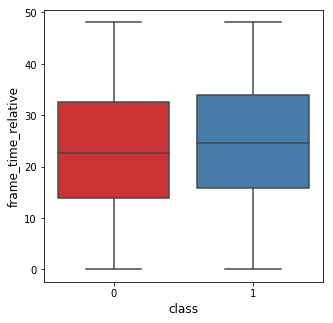

In [11]:
plt.figure(figsize=(5,5))

sns.boxplot(x='class', y='frame_time_relative', data=df, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('class', fontsize = 12)
plt.ylabel('frame_time_relative', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.savefig('area_delta_class.png')

### 2. Dropping of nan values in rows and columns

#### 2.1 Finding if there is any column or row with nan values

In [12]:
nan_df = df.isnull().any().tolist()

if True in nan_df: print('**There is nans in df_test!**\n\n', df.isnull().any())
else: print("No nans df")

No nans df


> As it is True in some columns (features) It was required to remove this samples

In [13]:
df.isnull().sum()

frame_time_delta       0
frame_time_epoch       0
frame_time_relative    0
frame_cap_len          0
frame_len              0
frame_number           0
ipv6_src               0
ipv6_dst               0
ipv6_plen              0
sixlowpan_pattern      0
wpan_ack_request       0
wpan_dst_addr_mode     0
wpan_fcf               0
wpan_fcs               0
wpan_frame_length      0
wpan_pending           0
wpan_seq_no            0
icmpv6_checksum        0
icmpv6_code            0
class                  0
dtype: int64

#### 2.2 Removing any nan value in any row or column

In [14]:
df_nonan_row = df.dropna(axis=0, how='all') #dropping rows whose any value is nan 

In [15]:
df_nonan_rowcol = df_nonan_row.dropna(axis=1, how='any') #dropping columns whose any value is nan 

In [16]:
df = df_nonan_rowcol # dataset without nan values

In [17]:
nan_df = df.isnull().any().tolist()

if True in nan_df: print('**There is nans in df_test!**\n\n', df.isnull().any())
else: print("No nans df")

No nans df


> As is expected the dataset is now ready to the next step

In [18]:
df.shape

(497526, 20)

### 3. Special care of hex values in string format

#### 3.1 Conversion of sring values into int

In [19]:
df['wpan_dst_addr_mode'] = df.wpan_dst_addr_mode.apply(int, base=16)
df['wpan_fcf'] = df.wpan_fcf.apply(int, base=16)
df['wpan_fcs'] = df.wpan_fcs.apply(int, base=16)
df['sixlowpan_pattern'] = df.sixlowpan_pattern.apply(int, base=16)
df['icmpv6_checksum'] = df.icmpv6_checksum.apply(int, base=16)

> Two features exhibited values in unsigned byte type (string hex values), therefore it was necessary to convert them into int values

In [20]:
df.head()

frame_time_delta  frame_time_epoch  frame_time_relative  frame_cap_len  \
0          0.000000      1.553720e+09             0.000000             64   
1          0.003288      1.553720e+09             0.003288             64   
2          0.003264      1.553720e+09             0.006552             64   
3          0.003296      1.553720e+09             0.009848             64   
4          0.003273      1.553720e+09             0.013121             64   

   frame_len  frame_number           ipv6_src  ipv6_dst  ipv6_plen  \
0         64             1  fe80::c30c:0:0:27  ff02::1a          6   
1         64             2  fe80::c30c:0:0:27  ff02::1a          6   
2         64             3  fe80::c30c:0:0:27  ff02::1a          6   
3         64             4  fe80::c30c:0:0:27  ff02::1a          6   
4         64             5  fe80::c30c:0:0:27  ff02::1a          6   

   sixlowpan_pattern  wpan_ack_request  wpan_dst_addr_mode  wpan_fcf  \
0                 65                 0                   2     55361   
1                 65                 0                   2     55361   
2                 65                 0                   2     55361   
3                 65                 0                   2     55361   
4                 65                 0                   2     55361   

   wpan_fcs  wpan_frame_length  wpan_pending  wpan_seq_no  icmpv6_checksum  \
0      4302                 64             0           64            41965   
1      4302                 64             0           64            41965   
2      4302                 64             0           64            41965   
3      4302                 64             0           64            41965   
4      4302                 64             0           64            41965   

   icmpv6_code  class  
0            0      0  
1            0      0  
2            0      0  
3            0      0  
4            0      0

### 4. Dataset Pre-processing 

#### 4.1 Finding out features data type 

In [21]:
df.columns

Index(['frame_time_delta', 'frame_time_epoch', 'frame_time_relative',
       'frame_cap_len', 'frame_len', 'frame_number', 'ipv6_src', 'ipv6_dst',
       'ipv6_plen', 'sixlowpan_pattern', 'wpan_ack_request',
       'wpan_dst_addr_mode', 'wpan_fcf', 'wpan_fcs', 'wpan_frame_length',
       'wpan_pending', 'wpan_seq_no', 'icmpv6_checksum', 'icmpv6_code',
       'class'],
      dtype='object')

In [22]:
df.get_dtype_counts()

float64     3
int64      15
object      2
dtype: int64

In [23]:
df.select_dtypes('object').columns

Index(['ipv6_src', 'ipv6_dst'], dtype='object')

> It is necessary to encode the object dtype features into numerical, using Label Encoding. Also it is indispensable to encode any others categorical features such as icmpv6.type, icmpv6.code , 6lowpan.pattern, wpan.dst_addr_mode using one-hot (1-to-n) encoding.

#### 4.2 Explaining the data

Class 0: 341821
Class 1: 155705
Proportion: 2.195 : 1


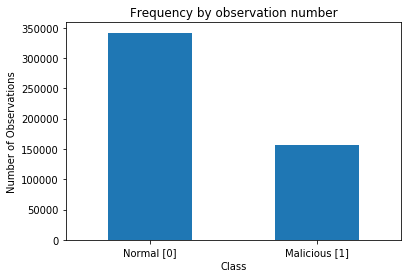

In [24]:
#if you don't have an intuitive sense of how imbalanced these two classes are, let's go visual
count_classes = pd.value_counts(df['class'], sort = True)
print('Class 0:', count_classes[0])
print('Class 1:', count_classes[1])
print('Proportion:', round(count_classes[0] / count_classes[1], 3), ': 1')

count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ['Normal [0]','Malicious [1]'])
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

##### 4.2.1 Dataset Balancing by ROS

In [25]:
X = df.iloc[:, 0:19] 
y = df.iloc[:, 19]

186116 new random picked points
Class 0: 341821
Class 1: 341821
Proportion: 1.0 : 1


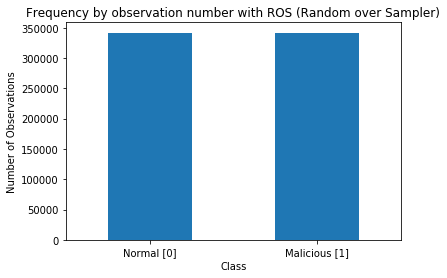

In [26]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

count_classes_ros = pd.value_counts(y_ros, sort = True)
print('Class 0:', count_classes_ros[0])
print('Class 1:', count_classes_ros[1])
print('Proportion:', round(count_classes_ros[0] / count_classes_ros[1], 2), ': 1')

count_classes_ros.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ['Normal [0]','Malicious [1]'])
plt.title("Frequency by observation number with ROS (Random over Sampler)")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [27]:
columns_csv_ros = df.columns.tolist()[:-1]
# columns_csv_ros

In [28]:
df_y_ros = pd.DataFrame(y_ros, columns=['class'])
print(df_y_ros.shape)

df_x_ros = pd.DataFrame(X_ros, columns=columns_csv_ros)
print(df_x_ros.shape)

(683642, 1)
(683642, 19)


In [29]:
df_ros = pd.concat([df_x_ros, df_y_ros], axis=1, ignore_index=False)
print(df_ros.shape)

(683642, 20)


In [30]:
df = df_ros

In [31]:
df.head()

frame_time_delta frame_time_epoch frame_time_relative frame_cap_len  \
0                0      1.55372e+09                   0            64   
1         0.003288      1.55372e+09            0.003288            64   
2         0.003264      1.55372e+09            0.006552            64   
3         0.003296      1.55372e+09            0.009848            64   
4         0.003273      1.55372e+09            0.013121            64   

  frame_len frame_number           ipv6_src  ipv6_dst ipv6_plen  \
0        64            1  fe80::c30c:0:0:27  ff02::1a         6   
1        64            2  fe80::c30c:0:0:27  ff02::1a         6   
2        64            3  fe80::c30c:0:0:27  ff02::1a         6   
3        64            4  fe80::c30c:0:0:27  ff02::1a         6   
4        64            5  fe80::c30c:0:0:27  ff02::1a         6   

  sixlowpan_pattern wpan_ack_request wpan_dst_addr_mode wpan_fcf wpan_fcs  \
0                65                0                  2    55361     4302   
1                65                0                  2    55361     4302   
2                65                0                  2    55361     4302   
3                65                0                  2    55361     4302   
4                65                0                  2    55361     4302   

  wpan_frame_length wpan_pending wpan_seq_no icmpv6_checksum icmpv6_code  \
0                64            0          64           41965           0   
1                64            0          64           41965           0   
2                64            0          64           41965           0   
3                64            0          64           41965           0   
4                64            0          64           41965           0   

   class  
0      0  
1      0  
2      0  
3      0  
4      0

#### 4.2 Label encoding for columns 'ipv6_src', 'ipv6_dst'

In [32]:
le = LabelEncoder()
df.iloc[:,6] = le.fit_transform(df.iloc[:,6])
df.iloc[:,7] = le.fit_transform(df.iloc[:,7])

In [33]:
print("Unique values for ipv6_src feature",df.iloc[:,6].unique())
print("Unique values for ipv6_dst feature",df.iloc[:,7].unique())

Unique values for ipv6_src feature [26 42 22 84 18 10 39 66 79 81 46 71 59 27 43 23 50 14 55 51  1 19 88 72
  3 62 31 30  6 69 67 63 11  7 34  2 76 75 56 36  0 47 15 85 24 40 74 60
 21 37 38 78 58  4 89 29 83 44 53 80 64 87 48 70 20 35 54  9  8 28 65 57
 45 32 17 86 73 41 52 12 68 82 77 16 49 13 61 25 90  5 33]
Unique values for ipv6_dst feature [86  0 16 19 34 22  9 21 69  2 65 73 18 83 67  7 35 81 63 29 61 74 43 20
 36 39 23 77 45 76  8 14 33 28 80 47 55 71 11  1 68 64 40 12 62 58 31 15
 50 60 37 51 10 66 84 52 44 27  3 79 38 72  5 25 30  6 59 26 24 48 46 53
 13 54 82 85 78 56 17 42 75 49  4 32 41 57 70]


> As it is showed, the former object values are now numerical 

#### 4.3 Normalization of frame_time_epoch

In [34]:
df['frame_time_epoch'] = df['frame_time_epoch'].astype(float)

In [35]:
# df['frame_time_epoch'] = df['frame_time_epoch'] - df.frame_time_epoch.min()

In [36]:
df.frame_time_epoch.describe()

count    6.836420e+05
mean     1.554126e+09
std      1.567541e+05
min      1.553720e+09
25%      1.554146e+09
50%      1.554199e+09
75%      1.554207e+09
max      1.554214e+09
Name: frame_time_epoch, dtype: float64

In [37]:
df['frame_time_epoch'] = np.log1p(df['frame_time_epoch'])

In [38]:
df.frame_time_epoch.describe()

count    683642.000000
mean         21.164179
std           0.000101
min          21.163918
25%          21.164192
50%          21.164226
75%          21.164232
max          21.164236
Name: frame_time_epoch, dtype: float64

In [39]:
# df.head()

#### 4.4 One hot encoding of categorical features using ColumnTransformer and standard scaler normalization

In [40]:
onehot_col = ['ipv6_dst', 'ipv6_src', 'icmpv6_code', 'wpan_dst_addr_mode', 'wpan_fcf', 'sixlowpan_pattern']
#onehot_col

In [41]:
#log_col = df.select_dtypes('float').columns.tolist()
#log_col = ['frame_time_delta', 'frame_time_epoch', 'frame_time_relative']
#log_col = []

In [42]:
int_col = ['frame_time_delta', 'frame_time_epoch', 'frame_time_relative', 'frame_cap_len', 'frame_len', 'frame_number', 'wpan_fcs', 'wpan_frame_length', 'wpan_seq_no', 'ipv6_plen', 'icmpv6_checksum']
#int_col

In [43]:
#stdscal_col = log_col+ int_col + onehot_col 
stdscal_col = int_col + onehot_col 
#stdscal_col


In [44]:
# transformer = FunctionTransformer(np.log1p)

In [45]:
preprocess = make_column_transformer(
    (StandardScaler(copy=True), stdscal_col),
    (OneHotEncoder(categories='auto', sparse=False), onehot_col)
)

In [46]:
df.shape

(683642, 20)

In [47]:
df.columns.get_loc('class')

19

In [48]:
X = df.iloc[:, 0:19] 
y = df.iloc[:, 19]

In [49]:
X_norm = preprocess.fit_transform(X)

/home/user/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/user/.local/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [50]:
# for i in range(0,48):
#     print(i, X_norm[:,i].mean())

In [51]:
print('Label Encoded Dataset shape:', df.iloc[:, 0:19].shape)
print('Normalized Dataset shape:', X_norm.shape)

Label Encoded Dataset shape: (683642, 19)
Normalized Dataset shape: (683642, 205)


In [52]:
print('Class subset shape:', y.shape)

Class subset shape: (683642,)


In [53]:
df_y_csv = pd.DataFrame(y)
print(df_y_csv.shape)

df_x_csv = pd.DataFrame(X_norm)
print(df_x_csv.shape)

(683642, 1)
(683642, 205)


In [54]:
# print(df_y_csv.isna().any())
# print(df_x_csv.isna().any())

In [55]:
df_x_csv.reset_index(drop=True, inplace=True)
df_y_csv.reset_index(drop=True, inplace=True)

In [56]:
df_allsamples_norm = pd.concat((df_x_csv,df_y_csv), axis=1)

In [57]:
print(df_allsamples_norm.shape)

(683642, 206)


In [58]:
nan_df_allsamples_norm = df_allsamples_norm.isnull().any().tolist()

if True in nan_df_allsamples_norm: print('**There is nans in df_test!**\n\n', df_allsamples_norm.isnull().any())
else: print("No nans in df_allsamples_norm")

No nans in df_allsamples_norm


#### 5. Writing Balanced Dataset

In [59]:
if fraction_factor == 3:
    ds_prefix = "Third"
elif fraction_factor == 2:
    ds_prefix = "Half"
elif fraction_factor == 1:
    ds_prefix = "Full"
print(ds_prefix)

Third


In [60]:
df_allsamples_norm.to_csv(os.path.join(pathds,"00BalancedDS/"+ds_prefix+"CloneID"+ds+"bal_stdscal.csv"), index=False)

In [61]:
print(df_allsamples_norm.shape)

(683642, 206)


In [62]:
df_from_csv = pd.read_csv(os.path.join(pathds,"00BalancedDS/"+ds_prefix+"CloneID"+ds+"bal_stdscal.csv"))

In [63]:
nan_df_from_csv = df_from_csv.isnull().any().tolist()

if True in nan_df_from_csv: print('**There is nans in df_test!**\n\n', df_from_csv.isnull().any())
else: print("No nans in df_allsamples_norm")

No nans in df_allsamples_norm


In [64]:
print(df_from_csv.shape)
print(df_from_csv.shape[1])

(683642, 206)
206


In [65]:
df_from_csv.head()

0         1         2         3         4         5         6  \
0 -0.120089 -2.592502 -2.111597 -1.681283 -1.681283 -1.628800 -1.505894   
1  0.247175 -2.592502 -2.111306 -1.681283 -1.681283 -1.628721 -1.505894   
2  0.244494 -2.592502 -2.111016 -1.681283 -1.681283 -1.628643 -1.505894   
3  0.248069 -2.592502 -2.110724 -1.681283 -1.681283 -1.628565 -1.505894   
4  0.245500 -2.592502 -2.110433 -1.681283 -1.681283 -1.628487 -1.505894   

          7         8         9  ...  196  197  198  199  200  201  202  203  \
0 -1.681283 -0.864844 -2.888764  ...  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
1 -1.681283 -0.864844 -2.888764  ...  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
2 -1.681283 -0.864844 -2.888764  ...  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
3 -1.681283 -0.864844 -2.888764  ...  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
4 -1.681283 -0.864844 -2.888764  ...  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   

   204  class  
0  1.0      0  
1  1.0      0  
2  1.0      0  
3  1.0      0  
4  1.0      0  

[5 rows x 206 columns]

In [66]:
X_ = df_from_csv.iloc[:, 0:df_from_csv.shape[1]-1] 
X_.describe()

0             1             2             3             4  \
count  6.836420e+05  6.836420e+05  6.836420e+05  6.836420e+05  6.836420e+05   
mean  -3.893402e-17 -1.173498e-10 -3.162947e-16  4.843991e-16  4.843991e-16   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -4.662424e-01 -2.592502e+00 -2.111597e+00 -1.681283e+00 -1.681283e+00   
25%   -8.870186e-02  1.280580e-01 -7.938241e-01 -7.684366e-01 -7.684366e-01   
50%   -2.235302e-02  4.653796e-01 -1.750377e-02 -7.684366e-01 -7.684366e-01   
75%    4.969244e-02  5.191585e-01  8.313065e-01  1.209397e+00  1.209397e+00   
max    2.258636e+02  5.624719e-01  2.151169e+00  1.209397e+00  1.209397e+00   

                  5             6             7             8             9  \
count  6.836420e+05  6.836420e+05  6.836420e+05  6.836420e+05  6.836420e+05   
mean  -4.731117e-17  1.605794e-16  4.843991e-16 -7.483314e-17  8.851097e-17   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -1.628800e+00 -1.731080e+00 -1.681283e+00 -1.773110e+00 -2.888764e+00   
25%   -8.395828e-01 -8.732384e-01 -7.684366e-01 -8.506519e-01 -4.863951e-01   
50%   -4.856659e-02  2.826386e-03 -7.684366e-01  8.483341e-04 -4.863951e-01   
75%    7.475347e-01  8.908648e-01  1.209397e+00  8.807319e-01  9.331867e-01   
max    3.023809e+00  1.709478e+00  1.209397e+00  1.845765e+00  9.331867e-01   

       ...            195            196            197            198  \
count  ...  683642.000000  683642.000000  683642.000000  683642.000000   
mean   ...       0.059477       0.443286       0.497237       0.201493   
std    ...       0.236516       0.496773       0.499993       0.401116   
min    ...       0.000000       0.000000       0.000000       0.000000   
25%    ...       0.000000       0.000000       0.000000       0.000000   
50%    ...       0.000000       0.000000       0.000000       0.000000   
75%    ...       0.000000       1.000000       1.000000       0.000000   
max    ...       1.000000       1.000000       1.000000       1.000000   

                 199            200            201            202  \
count  683642.000000  683642.000000  683642.000000  683642.000000   
mean        0.798507       0.201493       0.796639       0.001868   
std         0.401116       0.401116       0.402499       0.043179   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       1.000000       0.000000   
50%         1.000000       0.000000       1.000000       0.000000   
75%         1.000000       0.000000       1.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

                 203            204  
count  683642.000000  683642.000000  
mean        0.940523       0.059477  
std         0.236516       0.236516  
min         0.000000       0.000000  
25%         1.000000       0.000000  
50%         1.000000       0.000000  
75%         1.000000       0.000000  
max         1.000000       1.000000  

[8 rows x 205 columns]

In [67]:
y_ = df_from_csv.iloc[:, df_from_csv.shape[1]-1]

In [68]:
y_.describe()

count    683642.0
mean          0.5
std           0.5
min           0.0
25%           0.0
50%           0.5
75%           1.0
max           1.0
Name: class, dtype: float64

In [69]:
del df
del df_from_csv
del X_
del y_
del df_allsamples_norm
del X
del y
del X_norm
del df_full